In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
lst = list(range(0,100))
std = np.std(lst, ddof=1)
round(std,3)

29.011

In [6]:
df = pd.read_csv('games.csv')

In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64


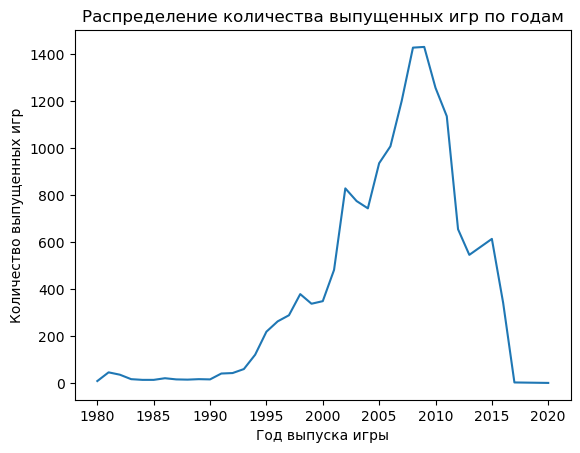

In [12]:
year_desc = df['Year'].describe()
print(year_desc)

# построить график распределения количества выпущенных игр по годам
df.groupby('Year')['Name'].count().plot(kind='line')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр')
plt.title('Распределение количества выпущенных игр по годам')
plt.show()

In [28]:
df['occurrence']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16593   NaN
16594   NaN
16595   NaN
16596   NaN
16597   NaN
Name: occurrence, Length: 16291, dtype: float64

In [32]:
df.drop('occurrence', axis=1, inplace=True)

In [33]:
df['occurrence'] = df['Platform'].value_counts(normalize=True)

In [38]:
platform_counts = df['Platform'].value_counts().sort_values(ascending=False)

In [39]:
platform_counts = platform_counts[platform_counts / platform_counts.sum() > 0.07]

In [40]:
result = ", ".join(platform_counts.index.tolist())

In [41]:
print(result)

DS, PS2, PS3, Wii, X360, PSP, PS


In [42]:
publisher_counts = df['Publisher'].value_counts().sort_values(ascending=False)

# Вывод наибольшей абсолютной частоты встречаемости
print(publisher_counts.iloc[0])

1339


In [46]:
# Выбор только тех строк, в которых указан издатель Nintendo
nintendo_sales = df.loc[df['Publisher'] == 'Nintendo', ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Подсчет среднего, медианы и стандартного отклонения по продажам в разных регионах
NA_sales = nintendo_sales['NA_Sales'].mean()
EU_sales = nintendo_sales['EU_Sales'].mean()
JP_sales = nintendo_sales['JP_Sales'].mean()
Other_sales = nintendo_sales['Other_Sales'].mean()
Global_sales = nintendo_sales['Global_Sales'].mean()

NA_median = nintendo_sales['NA_Sales'].median()
EU_median = nintendo_sales['EU_Sales'].median()
JP_median = nintendo_sales['JP_Sales'].median()
Other_median = nintendo_sales['Other_Sales'].median()
Global_median = nintendo_sales['Global_Sales'].median()

NA_std = nintendo_sales['NA_Sales'].std()
EU_std = nintendo_sales['EU_Sales'].std()
JP_std = nintendo_sales['JP_Sales'].std()
Other_std = nintendo_sales['Other_Sales'].std()
Global_std = nintendo_sales['Global_Sales'].std()

# Вывод результатов
print("Средние продажи Nintendo в регионах: NA - {:.2f}, EU - {:.2f}, JP - {:.2f}, Other - {:.2f}, Global - {:.2f}".format(NA_sales, EU_sales, JP_sales, Other_sales, Global_sales))
print("Медианные продажи Nintendo в регионах: NA - {:.2f}, EU - {:.2f}, JP - {:.2f}, Other - {:.2f}, Global - {:.2f}".format(NA_median, EU_median, JP_median, Other_median, Global_median))
print("Стандартное отклонение продаж Nintendo в регионах: NA - {:.2f}, EU - {:.2f}, JP - {:.2f}, Other - {:.2f}, Global - {:.2f}".format(NA_std, EU_std, JP_std, Other_std, Global_std))


Средние продажи Nintendo в регионах: NA - 1.17, EU - 0.60, JP - 0.65, Other - 0.14, Global - 2.56
Медианные продажи Nintendo в регионах: NA - 0.38, EU - 0.12, JP - 0.28, Other - 0.03, Global - 0.92
Стандартное отклонение продаж Nintendo в регионах: NA - 2.99, EU - 1.74, JP - 1.06, Other - 0.46, Global - 5.68


<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

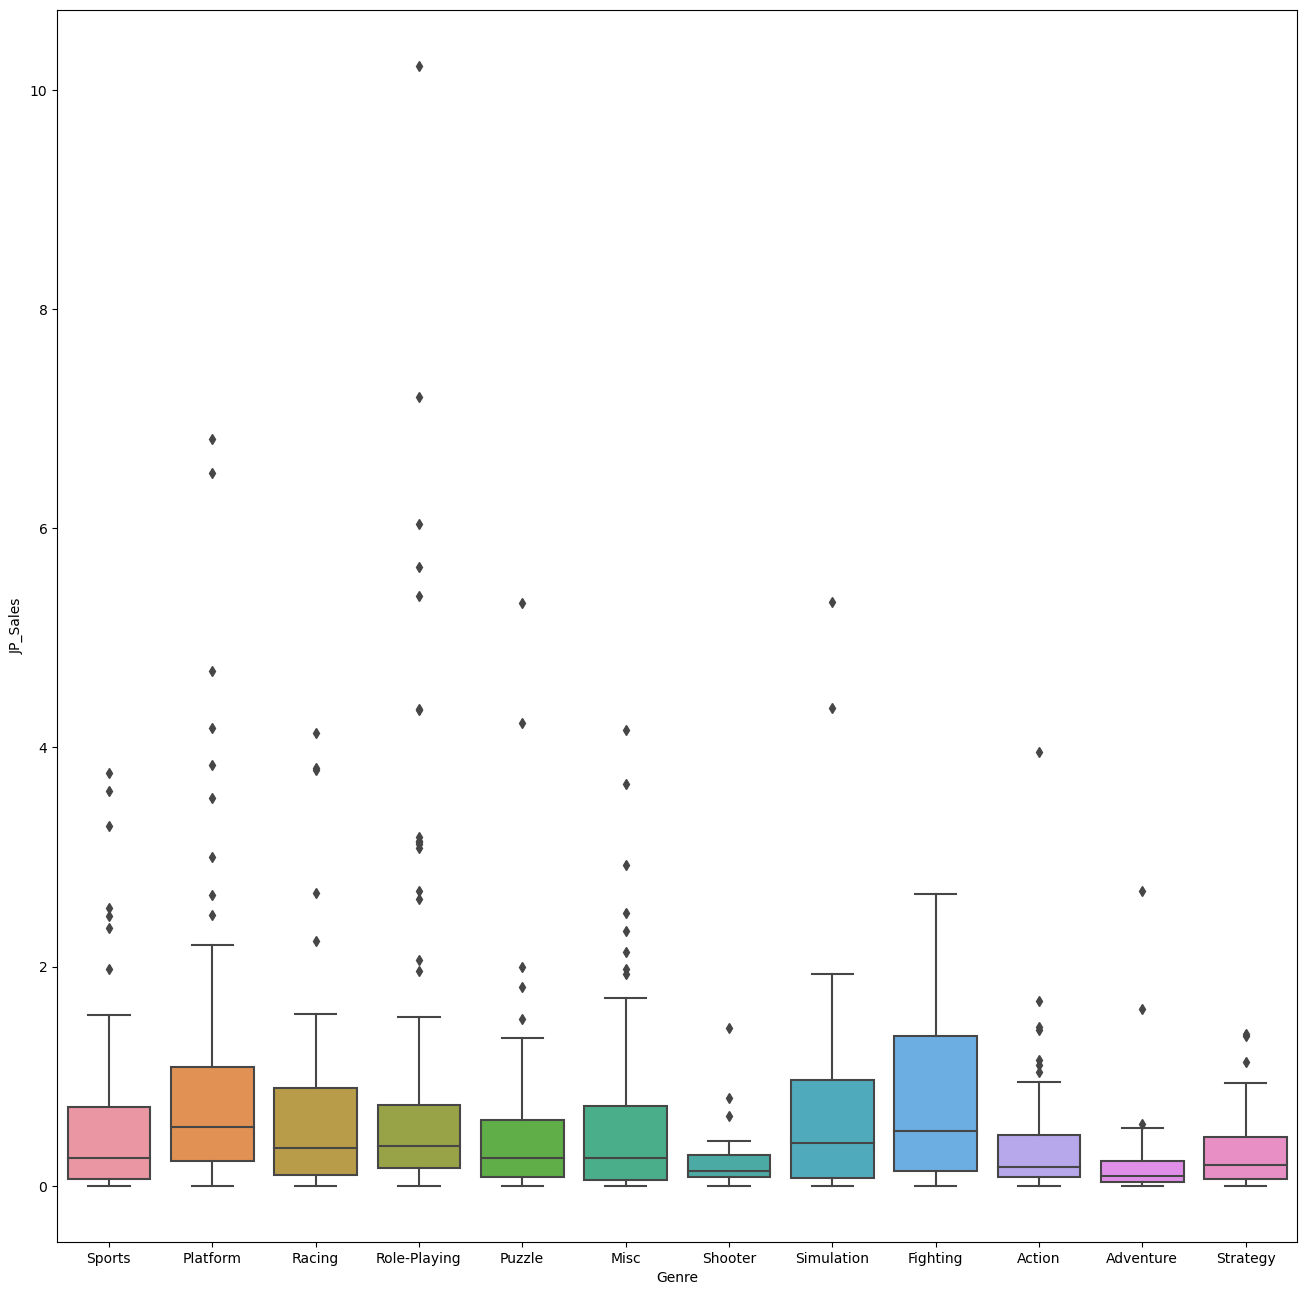

In [53]:
plt.figure(figsize=(16,16))
sns.boxplot(x='Genre', y='JP_Sales', data=df.loc[df['Publisher'] == 'Nintendo'])

In [54]:
nintendo_genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
nintendo_sales = df[(df['Publisher'] == 'Nintendo') & (df['Genre'].isin(nintendo_genres))]

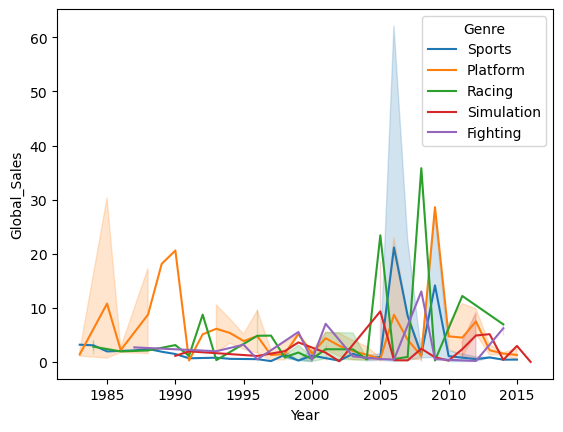

In [55]:
sns.lineplot(data=nintendo_sales, x='Year', y='Global_Sales', hue='Genre')
plt.show()